In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
import sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Hari/Evaluation/Classification/')
print(os.getcwd())
print(os.listdir())
sys.path.append(os.path.abspath("src"))

/content/drive/MyDrive/Hari/Evaluation/Classification
['src', 'results', 'notebooks', 'dataset']


In [ ]:
data_dir = "/content/drive/MyDrive/Hari/Evaluation/Classification/dataset"
from data_ import get_dataloaders
from model import ResNet20
from train import train_model

In [ ]:
from data_ import get_dataloaders

# Paths to NPZ files
train_npz = "/content/drive/MyDrive/Hari/Evaluation/Classification/dataset/train_data.npz"
val_npz = "/content/drive/MyDrive/Hari/Evaluation/Classification/dataset/val_data.npz"

# Get DataLoaders
dataloaders = get_dataloaders(train_npz, val_npz)

# Access train, val, and test loaders
train_loader = dataloaders["train"]
val_loader = dataloaders["val"]
test_loader = dataloaders["test"]

# Check batch
images, labels = next(iter(train_loader))
print(images.shape, labels.shape)  # We expect (200, 1, 150, 150), (200,)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


torch.Size([200, 1, 150, 150]) torch.Size([200])


In [ ]:
start_time = time.time()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet20().to(device)
end_time = time.time()
print(f"Model loaded! Time taken: {end_time - start_time:.2f} sec")

Model loaded! Time taken: 0.40 sec


In [ ]:
epochs = 20 # as in the paper
learning_rate = 0.0001 #to start, scheduler will take care later

In [ ]:
train_losses, val_losses, train_accs, val_accs = train_model(
    model, train_loader, val_loader, device, epochs, learning_rate
)

Training started!
Epoch 1 started


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Processing batch 146
Loss computed for batch 146
Batch 146 updated!
Processing batch 147
Loss computed for batch 147
Batch 147 updated!
Processing batch 148
Loss computed for batch 148
Batch 148 updated!
Processing batch 149
Loss computed for batch 149
Batch 149 updated!
Processing batch 150
Loss computed for batch 150
Batch 150 updated!
[Epoch 9/20] Train Loss: 0.427448 | Train Acc: 0.836 | Val Loss: 0.599203 | Val Acc: 0.760
Epoch 9 completed!
Epoch 10 started
Processing batch 1
Loss computed for batch 1
Batch 1 updated!
Processing batch 2
Loss computed for batch 2
Batch 2 updated!
Processing batch 3
Loss computed for batch 3
Batch 3 updated!
Processing batch 4
Loss computed for batch 4
Batch 4 updated!
Processing batch 5
Loss computed for batch 5
Batch 5 updated!
Processing batch 6
Loss computed for batch 6
Batch 6 updated!
Processing batch 7
Loss computed for batch 7
Batch 7 updated!
Processing batch 8
Loss computed for batch 8
Bat

In [ ]:
print("Train_Losses : \n",train_losses)
print("Val_Losses :  \n",val_losses)
print("Train_Accs :  \n",train_accs)
print("Val_Accs :  \n",val_accs)

Train_Losses : 
 [1.1026136604944865, 1.0970811065038044, 1.0327483002344768, 0.8687107658386231, 0.6871386925379436, 0.5674046935637792, 0.5007042729854584, 0.45504193564256035, 0.4274482838312785, 0.40138760149478914, 0.3858859930435816, 0.3802255549033483, 0.3561559621493022, 0.3473654439051946, 0.3388468278447787, 0.3290903068582217, 0.3219303662578265, 0.3128155642747879, 0.3079437472422918, 0.2984225460886955]
Val_Losses :  
 [1.1043156623840331, 1.1191012342770894, 0.9235283553600311, 0.8385663449764251, 1.3036906361579894, 0.5569506913423539, 0.6507302721341451, 0.6610612491766612, 0.5992029249668122, 0.4694183558225632, 0.6547875056664149, 0.6586173514525095, 0.5048439164956411, 0.3305987526973089, 0.42349072893460593, 0.3285866712530454, 0.3297497053941091, 0.3317316775520643, 0.3042144353191058, 0.6060429016749064]
Train_Accs :  
 [0.33786666666666665, 0.3524333333333333, 0.4349, 0.5736666666666667, 0.7081666666666667, 0.7742333333333333, 0.8061666666666667, 0.82516666666666

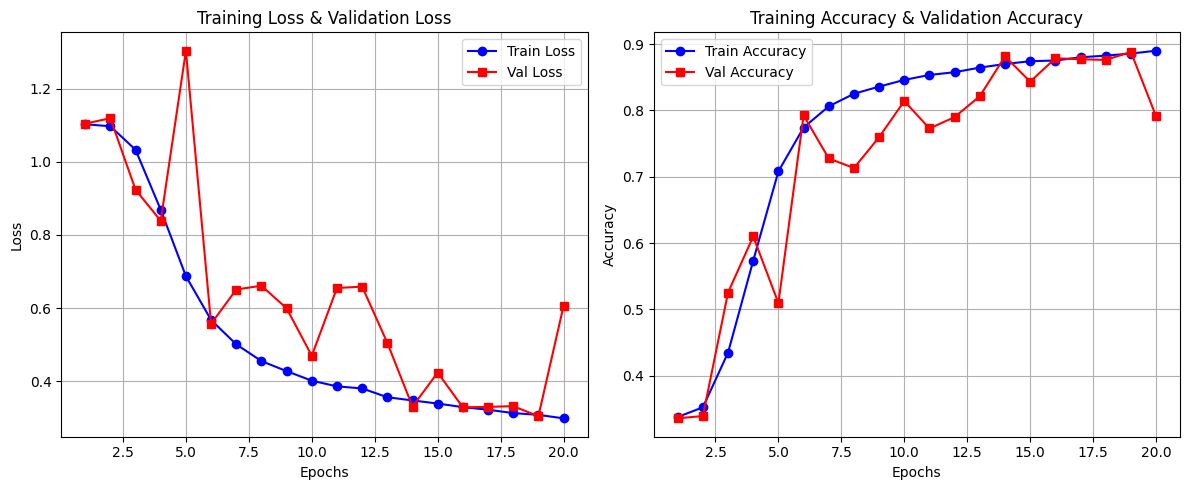

In [ ]:
epochs_ = range(1,len(train_losses)+1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_, train_losses, label="Train Loss", marker="o", color="blue")
plt.plot(epochs_, val_losses, label="Val Loss", marker="s", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss & Validation Loss")
plt.legend()
plt.grid(True)

# Plot Validation Loss & Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_, train_accs, label="Train Accuracy", marker="o", color="blue")
plt.plot(epochs_, val_accs, label="Val Accuracy", marker="s", color="red")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
model.load_state_dict(torch.load('./results/model_epoch_19.pth')) #Renamed this model weight file to Train_3_best.pth , find it at "./results/Train_3_best.pth"
model.to(device)
model.eval()

ResNet(
  (conv0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn0): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (block1): Sequential(
    (0): BasicConvBlock(
      (features): Sequential(
        (conv_1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn_1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu_1): ReLU()
        (conv_2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn_2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential()
    )
    (1): BasicConvBlock(
      (features): Sequential(
        (conv_1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn_1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu_1): ReLU()
        (c

In [ ]:
def evaluate(model, dataloader, device):
    """ Runs inference on the entire test dataset and computes accuracy & loss. """
    model.eval()  # Set model to evaluation mode
    total_loss, correct = 0, 0
    total_samples = 0

    with torch.no_grad():  # No gradients needed during inference
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)

            # Compute predictions
            preds = outputs.argmax(dim=1)  # Get class with highest probability
            correct += (preds == labels).sum().item()
            total_samples += labels.size(0)
            total_loss += loss.item() * images.size(0)

    # Compute final metrics
    avg_loss = total_loss / total_samples
    accuracy = correct / total_samples
    return avg_loss, accuracy

test_loss, test_acc = evaluate(model, test_loader, device)


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
print(test_acc)

0.896


Test Accuracy = 89.6%

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


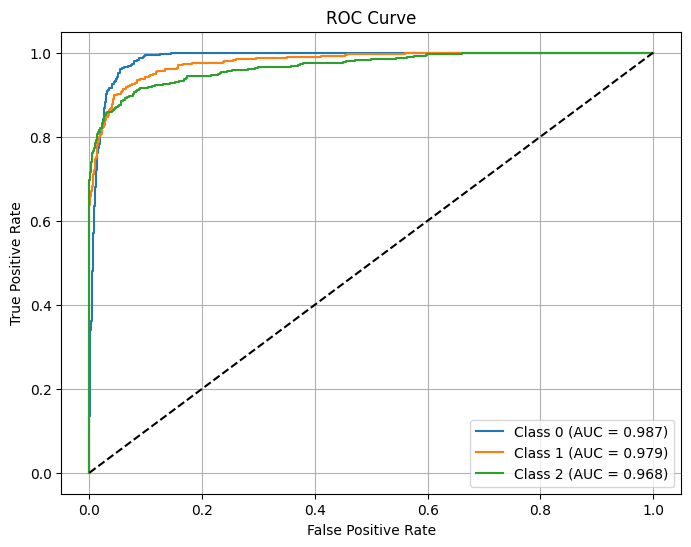

In [ ]:
#ROC and AUC analysis using sklearn :
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn.metrics import roc_auc_score

def compute_roc_auc(model, dataloader, device, num_classes=3):
    """Computes ROC curves and AUC scores for each class."""
    model.eval()

    all_labels = []
    all_probs = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.cpu().numpy()  # Convert labels to NumPy
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1).cpu().numpy()  # Get probabilities

            all_labels.extend(labels)
            all_probs.extend(probs)

    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)

    # Binarize labels for multi-class ROC
    all_labels_bin = label_binarize(all_labels, classes=np.arange(num_classes))

    # Compute ROC curve and AUC for each class
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    return fpr, tpr, roc_auc

def plot_roc_curves(fpr, tpr, roc_auc, num_classes=3):
    """Plots ROC curves for each class."""
    plt.figure(figsize=(8, 6))

    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.3f})")

    plt.plot([0, 1], [0, 1], "k--")  # Diagonal line (random classifier)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

#Compute ROC & AUC
fpr, tpr, roc_auc = compute_roc_auc(model, test_loader, device)

# Plot ROC Curves
plot_roc_curves(fpr, tpr, roc_auc)

In [ ]:
model.load_state_dict(torch.load('./results/model_epoch_20.pth')) #Renamed this model weight file to Train_3_final_ep.pth , find it at "./results/Train_3_final_ep.pth"
model.to(device)
model.eval()

ResNet(
  (conv0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn0): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (block1): Sequential(
    (0): BasicConvBlock(
      (features): Sequential(
        (conv_1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn_1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu_1): ReLU()
        (conv_2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn_2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential()
    )
    (1): BasicConvBlock(
      (features): Sequential(
        (conv_1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn_1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu_1): ReLU()
        (c

In [ ]:
def evaluate(model, dataloader, device):
    """ Runs inference on the entire test dataset and computes accuracy & loss. """
    model.eval()  # Set model to evaluation mode
    total_loss, correct = 0, 0
    total_samples = 0

    with torch.no_grad():  # No gradients needed during inference
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)

            # Compute predictions
            preds = outputs.argmax(dim=1)  # Get class with highest probability
            correct += (preds == labels).sum().item()
            total_samples += labels.size(0)
            total_loss += loss.item() * images.size(0)

    # Compute final metrics
    avg_loss = total_loss / total_samples
    accuracy = correct / total_samples
    return avg_loss, accuracy

test_loss, test_acc = evaluate(model, test_loader, device)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
print(test_acc)

0.7893333333333333


Test Accuracy : 78.933%

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


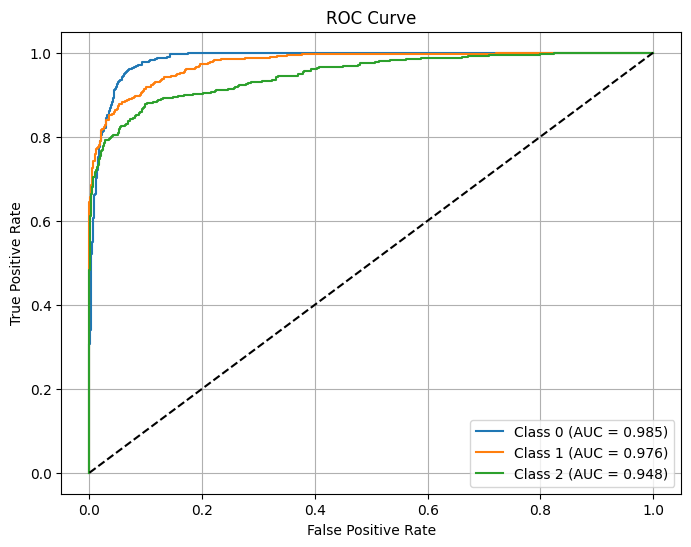

In [ ]:
#ROC and AUC analysis using sklearn :
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn.metrics import roc_auc_score

def compute_roc_auc(model, dataloader, device, num_classes=3):
    """Computes ROC curves and AUC scores for each class."""
    model.eval()

    all_labels = []
    all_probs = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.cpu().numpy()  # Convert labels to NumPy
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1).cpu().numpy()  # Get probabilities

            all_labels.extend(labels)
            all_probs.extend(probs)

    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)

    # Binarize labels for multi-class ROC
    all_labels_bin = label_binarize(all_labels, classes=np.arange(num_classes))

    # Compute ROC curve and AUC for each class
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    return fpr, tpr, roc_auc

def plot_roc_curves(fpr, tpr, roc_auc, num_classes=3):
    """Plots ROC curves for each class."""
    plt.figure(figsize=(8, 6))

    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.3f})")

    plt.plot([0, 1], [0, 1], "k--")  # Diagonal line (random classifier)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

#Compute ROC & AUC
fpr, tpr, roc_auc = compute_roc_auc(model, test_loader, device)

# Plot ROC Curves
plot_roc_curves(fpr, tpr, roc_auc)

The ROC and AUC analysis looks good enough , running on more epochs will yeild a better Test Accuracy. I will stop here though, due to limited GPU access. The final Model Weights are hence stored at "./results/Train_3_best.pth"(the best model performance, the one with test acc = 89.6%) and "./results/Train_3_final_ep.pth"(weights post last epoch, the one with test acc = 78.93%).


For Final Test , I recommend using model weights stored at "./results/Train_3_best.pth" follwing this directory structure.